## Problem 1: Visualise data in a static map (10 points)


Create a *static* **thematic map** using the skills you learnt during lesson 5. The map should <br>
contain more than one layer (from at least two different data sets). Pay attention to classification <br>
and visualisation (appropriate colour scheme choice, etc.). Write your code in this notebook, and <br>
store the resulting maps in `.png` format in the `NOTEBOOK_DIRECTORY / "docs"` folder.

### Topic of the map

- Use any of the data sets we have used during the course (travel time data, population grid), or <br>
  any other data set of your interest (for example, [open data sets from Statistics Finland](https://www.stat.fi/org/avoindata/index_en.html), <br>
  or the open geo-data from [the Helsinki Region Infoshare](https://hri.fi/en)). If you download <br>
  data sets, add, commit, and push them to the `DATA_DIRECTORY`. Be sure to include an attribution <br>
  to each data set in your output map!
- Feel free to start from and adapt examples from the course material! You can take one step further <br>
  and add additional analysis to, e.g., the shopping centre dominance or the population within vincinity <br>
  of certain addresses)

### Criteria

- The map has more than one data layer (for instance, the results of an analysis, and the road network <br>
  to illustrate a complex spatial pattern). If (and only if) you think it adds additional value, feel <br>
  free to add a base map (but a base map does not count as an own layer) (2 points)
- The map portrays the output of an analysis or a classification that adds value beyond just displaying <br>
  the raw data (3 points)
- The map follows good cartographic practices (appropriate map extent and zoom level, colour scheme, <br>
  legend and data sources, etc.) (5 points)

### Output

- Save the map(s) in `.png` format in the `NOTEBOOK_DIRECTORY / "docs"` folder, remember to add, commit, <br>
  and push them to the GitHub repository
- Remember to also add, commit, and push input data sets and code

---

In [2]:
import pathlib 
NOTEBOOK_PATH = pathlib.Path().resolve()
DATA_DIRECTORY = NOTEBOOK_PATH / "data"
OUTPUT_DIRECTORY = NOTEBOOK_PATH / "docs"

In [9]:
# downloading NYC transportation data
#https://data.cityofnewyork.us/Public-Safety/Motor-Vehicle-Collisions-Crashes/h9gi-nx95/about_data
import datetime
from sodapy import Socrata
client = Socrata("data.cityofnewyork.us",None)
dataset_id = "h9gi-nx95"

try:
    # Get the most recent 3000000 crash records (you might want to adjust the query)
    results = client.get(dataset_id, limit=3_000_000, order='crash_date DESC')

    print(f"Fetched {len(results)} recent crash records.")
    # Process your results here
    # for item in results:
    #     print(item['crash_date'], item.get('latitude'), item.get('longitude'))

except Exception as e:
    print(f"An error occurred: {e}")

Fetched 2178109 recent crash records.


In [2]:
# ADD YOUR OWN CODE HERE

In [36]:
import pandas as pd
import geopandas as gpd
df = pd.DataFrame(
    results
)
df.head()



,crash_date,crash_time,borough,zip_code,latitude,longitude,location,on_street_name,off_street_name,number_of_persons_injured,...,collision_id,vehicle_type_code1,vehicle_type_code2,contributing_factor_vehicle_3,contributing_factor_vehicle_4,vehicle_type_code_3,vehicle_type_code_4,cross_street_name,contributing_factor_vehicle_5,vehicle_type_code_5
0,2025-05-20T00:00:00.000,15:19,MANHATTAN,10027,40.820625,-73.95841,"{'latitude': '40.820625', 'longitude': '-73.95...",W 134 ST,12 AVE,0,...,4814422,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2025-05-20T00:00:00.000,7:40,QUEENS,11428,40.715958,-73.74564,"{'latitude': '40.715958', 'longitude': '-73.74...",JAMAICA AVE,212 PL,1,...,4814742,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2025-05-20T00:00:00.000,8:30,NaN,NaN,40.583992,-73.96866,"{'latitude': '40.583992', 'longitude': '-73.96...",BELT PARKWAY RAMP,NaN,1,...,4814360,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2025-05-20T00:00:00.000,17:30,BRONX,10457,40.847027,-73.89806,"{'latitude': '40.847027', 'longitude': '-73.89...",E TREMONT AVE,WASHINGTON AVE,1,...,4814478,E-Bike,Sedan,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2025-05-20T00:00:00.000,20:45,MANHATTAN,10128,40.782944,-73.94804,"{'latitude': '40.782944', 'longitude': '-73.94...",E 94 ST,2 AVE,1,...,4814750,Taxi,Bike,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: >

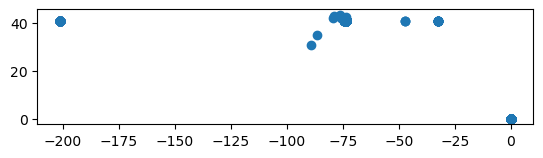

In [24]:

#creating a geodataframe 
nyc_crashes = gpd.GeoDataFrame(
    data = df,
    geometry = gpd.points_from_xy(df.longitude, df.latitude, crs="EPSG:4326"),
    crs = "EPSG:4326"
)


In [37]:
nyc_crashes.columns.to_list()

['crash_date',
 'crash_time',
 'borough',
 'zip_code',
 'latitude',
 'longitude',
 'location',
 'on_street_name',
 'off_street_name',
 'number_of_persons_injured',
 'number_of_persons_killed',
 'number_of_pedestrians_injured',
 'number_of_pedestrians_killed',
 'number_of_cyclist_injured',
 'number_of_cyclist_killed',
 'number_of_motorist_injured',
 'number_of_motorist_killed',
 'contributing_factor_vehicle_1',
 'contributing_factor_vehicle_2',
 'collision_id',
 'vehicle_type_code1',
 'vehicle_type_code2',
 'contributing_factor_vehicle_3',
 'contributing_factor_vehicle_4',
 'vehicle_type_code_3',
 'vehicle_type_code_4',
 'cross_street_name',
 'contributing_factor_vehicle_5',
 'vehicle_type_code_5',
 'geometry']

In [41]:
columns_dtypes= {
    'crash_date':'datetime64[ns]',
 'crash_time':'datetime64[ns]',
    'number_of_persons_injured':'Int64',
 'number_of_persons_killed':'Int64',
 'number_of_pedestrians_injured':'Int64',
 'number_of_pedestrians_killed':'Int64',
 'number_of_cyclist_injured':'Int64',
 'number_of_cyclist_killed':'Int64',
 'number_of_motorist_injured':'Int64',
 'number_of_motorist_killed':'Int64',
    'collision_id':'Int64'
}
 

#cleaning data type functions
def data_type_cleaner(dataframe,columns_dtype_dict):
    """function takes a dataframe or geodataframe along with a dictionary of columns
    in the dataframe and their corresponding datatypes, and returns the same 
    dataframe with updated datatypes.
    """
    for key,value in columns_dtype_dict.items():
        dataframe[key] = dataframe[key].astype(value)
    return dataframe

data_type_cleaner(nyc_crashes,columns_dtypes)
nyc_crashes.info()
        

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2178109 entries, 0 to 2178108
Data columns (total 30 columns):
 #   Column                         Dtype         
---  ------                         -----         
 0   crash_date                     datetime64[ns]
 1   crash_time                     datetime64[ns]
 2   borough                        object        
 3   zip_code                       object        
 4   latitude                       object        
 5   longitude                      object        
 6   location                       object        
 7   on_street_name                 object        
 8   off_street_name                object        
 9   number_of_persons_injured      Int64         
 10  number_of_persons_killed       Int64         
 11  number_of_pedestrians_injured  Int64         
 12  number_of_pedestrians_killed   Int64         
 13  number_of_cyclist_injured      Int64         
 14  number_of_cyclist_killed       Int64         
 15  number_

In [48]:
#geocode zipcodes
import geopy.geocoders
zip_code_dataset_id = 'pri4-ifjk'

try:
    # Get the most recent 3000000 crash records (you might want to adjust the query)
    ny_zipcodes = client.get(zip_code_dataset_id, limit=3_000_000, order='pop_est')

    print(f"Fetched {len(ny_zipcodes)} zip_codes.")


except Exception as e:
    print(f"An error occurred: {e}")

  

Fetched 178 zip_codes.


TypeError: list indices must be integers or slices, not str

In [53]:
nyc_zipcode_geocoded = gpd.read_file("data/Modified Zip Code Tabulation Areas (MODZCTA)_20250524/geo_export_aee478b7-41fe-433a-aa30-1ba3d4663ec2.shp")
nyc_zipcode_geocoded.head()

,modzcta,label,zcta,pop_est,geometry
0,10001,"10001, 10118","10001, 10119, 10199",23072.0,"POLYGON ((-73.98774 40.74407, -73.98819 40.743..."
1,10002,10002,10002,74993.0,"POLYGON ((-73.9975 40.71407, -73.99709 40.7146..."
2,10003,10003,10003,54682.0,"POLYGON ((-73.98864 40.72293, -73.98876 40.722..."
3,10026,10026,10026,39363.0,"MULTIPOLYGON (((-73.96201 40.80551, -73.96007 ..."
4,10004,10004,10004,3028.0,"MULTIPOLYGON (((-74.00827 40.70772, -74.00937 ..."


In [63]:
nyc_nyc_crashes_zipcode_joined = gpd.sjoin(nyc_crashes,
                                           nyc_zipcode_geocoded,
                                          how = 'right',
                                          predicate = 'within',
                                          lsuffix="crashes")


In [64]:
nyc_nyc_crashes_zipcode_joined.head()

,index_crashes,crash_date,crash_time,borough,zip_code,latitude,longitude,location,on_street_name,off_street_name,...,vehicle_type_code_3,vehicle_type_code_4,cross_street_name,contributing_factor_vehicle_5,vehicle_type_code_5,modzcta,label,zcta,pop_est,geometry
0,26,2025-05-20,2025-05-24 14:40:00,MANHATTAN,10001,40.757107,-74.00443,"{'latitude': '40.757107', 'longitude': '-74.00...",NaN,NaN,...,NaN,NaN,655 W 34 ST,NaN,NaN,10001,"10001, 10118","10001, 10119, 10199",23072.0,"POLYGON ((-73.98774 40.74407, -73.98819 40.743..."
0,158,2025-05-20,2025-05-24 20:20:00,MANHATTAN,10001,40.749672,-73.9953,"{'latitude': '40.749672', 'longitude': '-73.99...",8 AVE,W 30 ST,...,NaN,NaN,NaN,NaN,NaN,10001,"10001, 10118","10001, 10119, 10199",23072.0,"POLYGON ((-73.98774 40.74407, -73.98819 40.743..."
0,207,2025-05-19,2025-05-24 22:43:00,MANHATTAN,10001,40.752724,-73.99679,"{'latitude': '40.752724', 'longitude': '-73.99...",W 33 ST,9 AVE,...,NaN,NaN,NaN,NaN,NaN,10001,"10001, 10118","10001, 10119, 10199",23072.0,"POLYGON ((-73.98774 40.74407, -73.98819 40.743..."
0,272,2025-05-19,2025-05-24 07:33:00,MANHATTAN,10001,40.75391,-73.99961,"{'latitude': '40.75391', 'longitude': '-73.999...",W 33 ST,10 AVE,...,NaN,NaN,NaN,NaN,NaN,10001,"10001, 10118","10001, 10119, 10199",23072.0,"POLYGON ((-73.98774 40.74407, -73.98819 40.743..."
0,361,2025-05-19,2025-05-24 12:48:00,MANHATTAN,10001,40.75099,-73.99062,"{'latitude': '40.75099', 'longitude': '-73.990...",W 34 ST,7 AVE,...,NaN,NaN,NaN,NaN,NaN,10001,"10001, 10118","10001, 10119, 10199",23072.0,"POLYGON ((-73.98774 40.74407, -73.98819 40.743..."


In [69]:
nyc_zipcode_geocoded.crs == nyc_crashes.crs

True

In [71]:
crashes_2025 = nyc_nyc_crashes_zipcode_joined[nyc_nyc_crashes_zipcode_joined['crash_date'].dt.year.isin([2024])]



In [72]:
number_crashes_zip_2025 = crashes_2025.dissolve(by = 'modzcta', aggfunc= 'count')

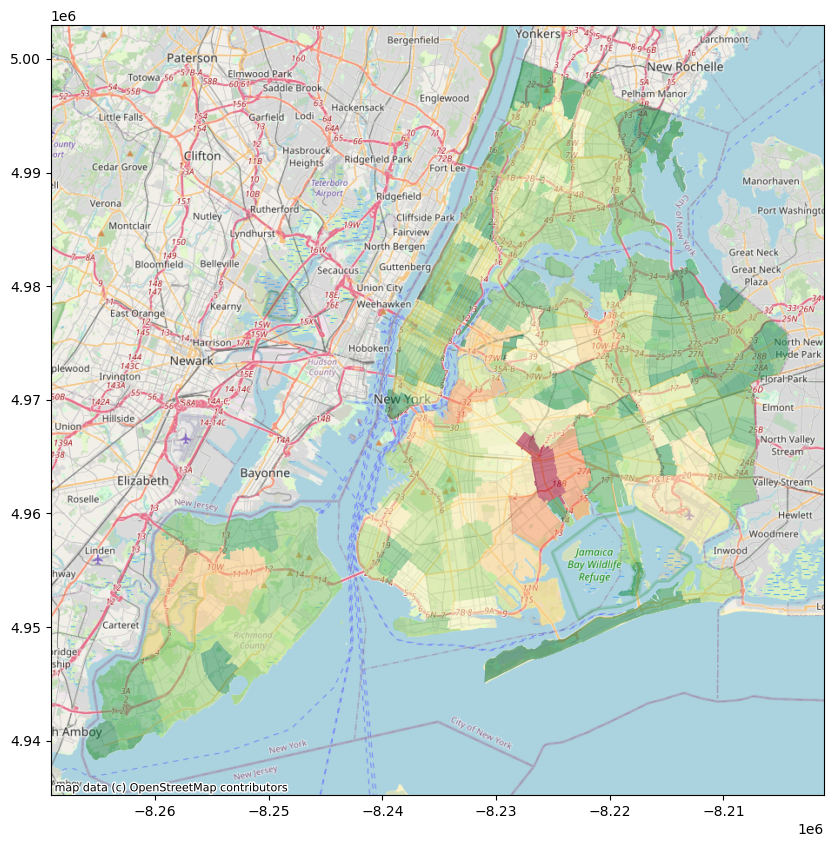

In [86]:
import contextily
number_crashes_zip_2025=number_crashes_zip_2025.to_crs('EPSG:3857')
ax = number_crashes_zip_2025.plot(column = 'index_crashes', cmap= 'RdYlGn_r',figsize= (12,10), alpha = 0.5)
contextily.add_basemap(
    ax,
    source=contextily.providers.OpenStreetMap.Mapnik,
    attribution=(
        "map data (c) OpenStreetMap contributors"
    )
)

In [83]:
contextily.providers

{'OpenStreetMap': {'Mapnik': {'url': 'https://tile.openstreetmap.org/{z}/{x}/{y}.png',
   'max_zoom': 19,
   'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
   'attribution': '(C) OpenStreetMap contributors',
   'name': 'OpenStreetMap.Mapnik'},
  'DE': {'url': 'https://tile.openstreetmap.de/{z}/{x}/{y}.png',
   'max_zoom': 18,
   'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
   'attribution': '(C) OpenStreetMap contributors',
   'name': 'OpenStreetMap.DE'},
  'CH': {'url': 'https://tile.osm.ch/switzerland/{z}/{x}/{y}.png',
   'max_zoom': 18,
   'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
   'attribution': '(C) OpenStreetMap contributors',
   'bounds': [[45, 5], [48, 11]],
   'name': 'OpenStreetMap.CH'},
  'France': {'url': 'https://{s}.tile.openstreetmap.fr/osmfr/{z}/{x}/{y}.png',
   'max_zoom': 20,
   'html_attribution': '&copy; OpenStreetMap France | &copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
   'attribution': '(C) OpenStreetMap France | (C) OpenStreetMap contributors',
   'name': 'OpenStreetMap.France'},
  'HOT': {'url': 'https://{s}.tile.openstreetmap.fr/hot/{z}/{x}/{y}.png',
   'max_zoom': 19,
   'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors, Tiles style by <a href="https://www.hotosm.org/" target="_blank">Humanitarian OpenStreetMap Team</a> hosted by <a href="https://openstreetmap.fr/" target="_blank">OpenStreetMap France</a>',
   'attribution': '(C) OpenStreetMap contributors, Tiles style by Humanitarian OpenStreetMap Team hosted by OpenStreetMap France',
   'name': 'OpenStreetMap.HOT'},
  'BZH': {'url': 'https://tile.openstreetmap.bzh/br/{z}/{x}/{y}.png',
   'max_zoom': 19,
   'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors, Tiles courtesy of <a href="http://www.openstreetmap.bzh/" target="_blank">Breton OpenStreetMap Team</a>',
   'attribution': '(C) OpenStreetMap contributors, Tiles courtesy of Breton OpenStreetMap Team',
   'bounds': [[46.2, -5.5], [50, 0.7]],
   'name': 'OpenStreetMap.BZH'},
  'CAT': {'url': 'https://tile.openstreetmap.bzh/ca/{z}/{x}/{y}.png',
   'max_zoom': 19,
   'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors, Tiles courtesy of <a href="https://www.openstreetmap.cat" target="_blank">Breton OpenStreetMap Team</a>',
   'attribution': '(C) OpenStreetMap contributors, Tiles courtesy of Breton OpenStreetMap Team',
   'name': 'OpenStreetMap.CAT'}},
 'MapTilesAPI': {'OSMEnglish': {'url': 'https://maptiles.p.rapidapi.com/{variant}/{z}/{x}/{y}.png?rapidapi-key={apikey}',
   'html_attribution': '&copy; <a href="http://www.maptilesapi.com/">MapTiles API</a>, &copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
   'attribution': '(C) MapTiles API, (C) OpenStreetMap contributors',
   'variant': 'en/map/v1',
   'apikey': '<insert your api key here>',
   'max_zoom': 19,
   'name': 'MapTilesAPI.OSMEnglish'},
  'OSMFrancais': {'url': 'https://maptiles.p.rapidapi.com/{variant}/{z}/{x}/{y}.png?rapidapi-key={apikey}',
   'html_attribution': '&copy; <a href="http://www.maptilesapi.com/">MapTiles API</a>, &copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
   'attribution': '(C) MapTiles API, (C) OpenStreetMap contributors',
   'variant': 'fr/map/v1',
   'apikey': '<insert your api key here>',
   'max_zoom': 19,
   'name': 'MapTilesAPI.OSMFrancais'},
  'OSMEspagnol': {'url': 'https://maptiles.p.rapidapi.com/{variant}/{z}/{x}/{y}.png?rapidapi-key={apikey}',
   'html_attribution': '&copy; <a href="http://www.maptilesapi.com/">MapTiles API</a>, &copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contribut